# Microsoft Azure Predictive Maintenance

**Date:** July 23rd, 2025  
**Author:** Paola Rocha  
**Description:** In this Jupyter notebook, I perform an Exploratory Data Analysis (EDA) on the *Microsoft Azure Predictive Maintenance* dataset. The main objective is to extract key insights from the data to better understand its structure and patterns. In the later stages, I will develop a Machine Learning model to predict the likelihood of machine failure in the near future.

**Dataset:** [Microsoft Azure Predictive Maintenance](https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance/data) on kaggle.

**Content:**  
* **Data Description:** Brief overview of the datasets used in this notebook.  
* **Loading Data:** Importing the libraries and loading the datasets.  
* **Basic Visualizations:** Visualizations and insights for each dataset.  
* **Next Steps:** Activities to continue developing the Machine Learning model.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data description

According to Kaggle page, the project consists of 5 datasets:

* **Telemetry Time Series Data (PdM_telemetry.csv)**: It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.
* **Error (PdM_errors.csv)**: These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.
* **Maintenance (PdM_maint.csv)**: If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 
    1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 
    2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.
* **Failures (PdM_failures.csv)**: Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.
* **Metadata of Machines (PdM_Machines.csv)**: Model type & age of the Machines.

These datasets together enable us to track telemetry signals, identify errors and failures, and understand machine behavior over time.

## Loading data

In [ ]:
errors = pd.read_csv('../data/raw/PdM_errors.csv', parse_dates=['datetime'], dtype={'machineID': 'str'})
failures = pd.read_csv('../data/raw/PdM_failures.csv', parse_dates=['datetime'])
machines = pd.read_csv('../data/raw/PdM_machines.csv')
maintenance = pd.read_csv('../data/raw/PdM_maint.csv', parse_dates=['datetime'])
telemetry = pd.read_csv('../data/raw/PdM_telemetry.csv', parse_dates=['datetime'])

By reviewing the datasets, all of them does not have null values, so no need to add a step for data cleaning.

In [5]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   object        
 2   errorID    3919 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 92.0+ KB


In [6]:
telemetry.describe()

,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


## Basic visualizations

### Machine information

In this section, we will answer the following questions:
* **How many different machines are there?**
* **What does the age distribution look like?**
----

The dataset contains **100 machines** of **4 different models**, and with an average age around of 11.33 *years*, indicating that most machines are relatively *old*.

We can see that:
* Machines with `"model3"` model are most common
* while `"model1"` appears the least frequently

In [7]:
machines['age'].describe()

count    100.000000
mean      11.330000
std        5.856974
min        0.000000
25%        6.750000
50%       12.000000
75%       16.000000
max       20.000000
Name: age, dtype: float64

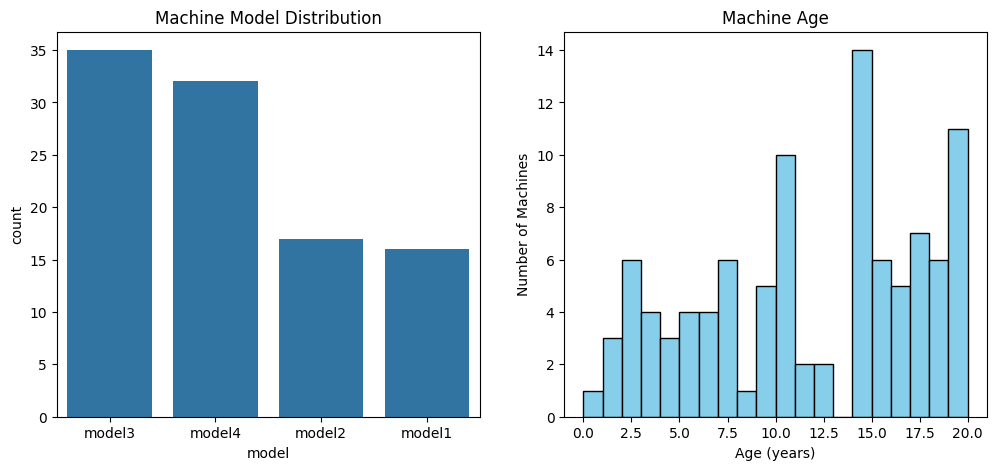

In [8]:
plt.figure(figsize=(12, 5))

# Model distribution of the machines
plt.subplot(1, 2, 1)
sns.countplot(data=machines, x='model', order=machines['model'].value_counts().index)
plt.title("Machine Model Distribution")

# Age distribution of the machines
plt.subplot(1, 2, 2)
plt.hist(machines['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Machine Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Machines')
plt.show()

### Error analysis

In this section, we will answer the following questions:
* **How many different error types are there?**
* **Which are the top 10 machines with the most errors?**
* **How many errors occur on a daily basis?**
----

There are 5 types of errors in the dataset:
* `"error1"` is the most frequent
* `"error5"` is the least frequent

The chart below shows the Top 10 machines with the highest number of errors, with Machine ID 22 having the most error events during maintenance operations

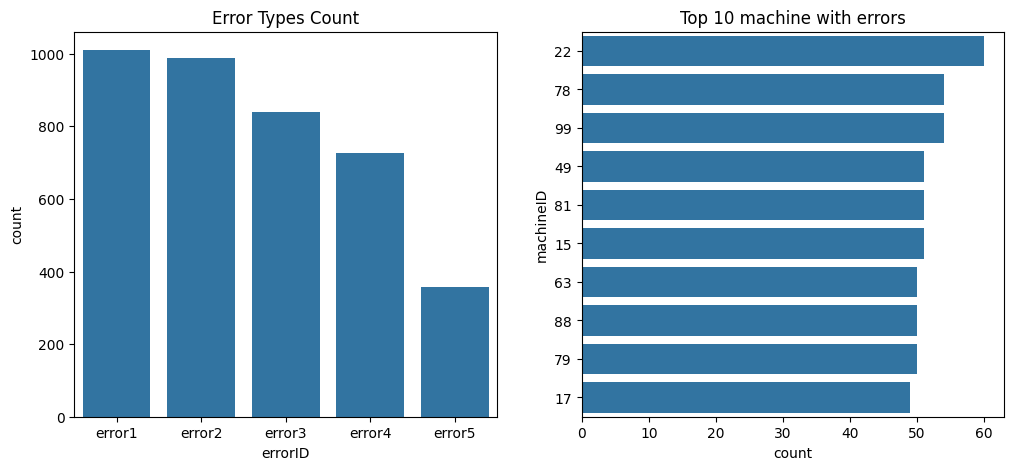

In [9]:
plt.figure(figsize=(12, 5))

# Error types count
plt.subplot(1, 2, 1)
sns.countplot(data=errors, x='errorID', order=errors['errorID'].value_counts().index)
plt.title("Error Types Count")

plt.subplot(1, 2, 2)
sns.countplot(data=errors, y='machineID', order=errors['machineID'].value_counts().head(10).index, orient='v')
plt.title("Top 10 machine with errors")
plt.show()

We also analyzed the daily error frequency. As shown in the plot below, there is an average of approximately 10 errors per day. However, there are a few outliers, such as one instance where 23 errors occurred in a single day, indicating potential periods of instability or unusual machine behavior

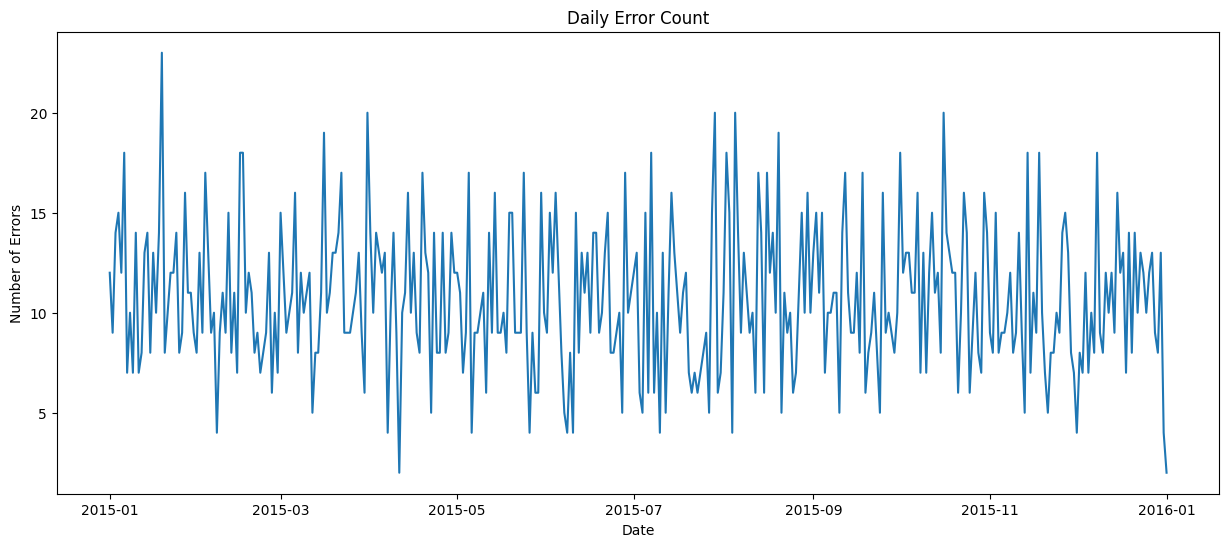

In [10]:
# Daily errors
errors['date'] = errors['datetime'].dt.date
daily_errors = errors.groupby('date').size()

plt.figure(figsize=(15, 6))
daily_errors.plot()
plt.title('Daily Error Count')
plt.xlabel('Date')
plt.ylabel('Number of Errors')
plt.show()

In [11]:
daily_errors.describe()

count    366.000000
mean      10.707650
std        3.628547
min        2.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       23.000000
dtype: float64

### Maintenance

In this section, we will answer the following questions:
* **Which components receive the most maintenance?**
* **How recurrent the maintenance actions are performed?**
----

The maintenance events across components are fairly well distributed, with no significant differences in frequency:

* `comp2` is the most frequently maintained component
* `comp1` has the fewest maintenance events

However, the difference in frequency between them is relatively small.

When analyzing the daily maintenance trend, we observe a noticeable change in maintenance frequency during 2015. Maintenance events in 2015 appear more frequent and follow a clearer periodic pattern, which may indicate a more structured or proactive maintenance routine.

It’s important to note that the other datasets (errors, failures, and telemetry) only include data from 2015. Therefore, for consistency, I may choose to focus solely on the 2015 records for model training purposes in the later stages.

In [12]:
maintenance['comp'].value_counts()

comp
comp2    863
comp4    811
comp3    808
comp1    804
Name: count, dtype: int64

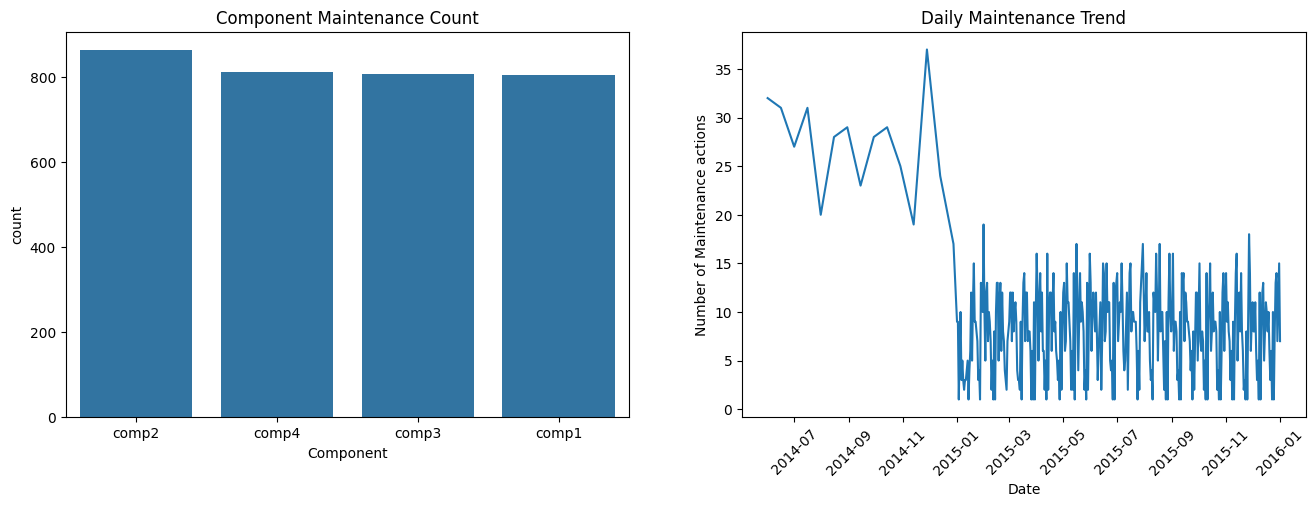

In [ ]:
plt.figure(figsize=(16, 5))

# Component Maintenance count
plt.subplot(1, 2, 1)
sns.countplot(data=maintenance, x='comp', order=maintenance['comp'].value_counts().index)
plt.title("Component Maintenance Count")
plt.xlabel("Component")

plt.subplot(1, 2, 2)
maintenance['date'] = maintenance['datetime'].dt.date
daily_maint = maintenance.groupby('date').size()
daily_maint.plot()
plt.title('Daily Maintenance Trend')
plt.xlabel('Date')
plt.ylabel('Number of Maintenance actions')
plt.xticks(rotation=45)
plt.show()

### Failures

In this section, we will answer the following questions:
* **Which are the top 10 machines with the most failures?**
* **How frequently do failures occur on a daily basis?**
----

From the plot below, the machines with the highest number of failures are the machines with IDs 99, 98, 22, and 17.

In the time series plot, there is no clear trend visible at first glance. However, we observe a notable decrease in failure events at the beginning of 2015, which coincides with a period of more regular maintenance events

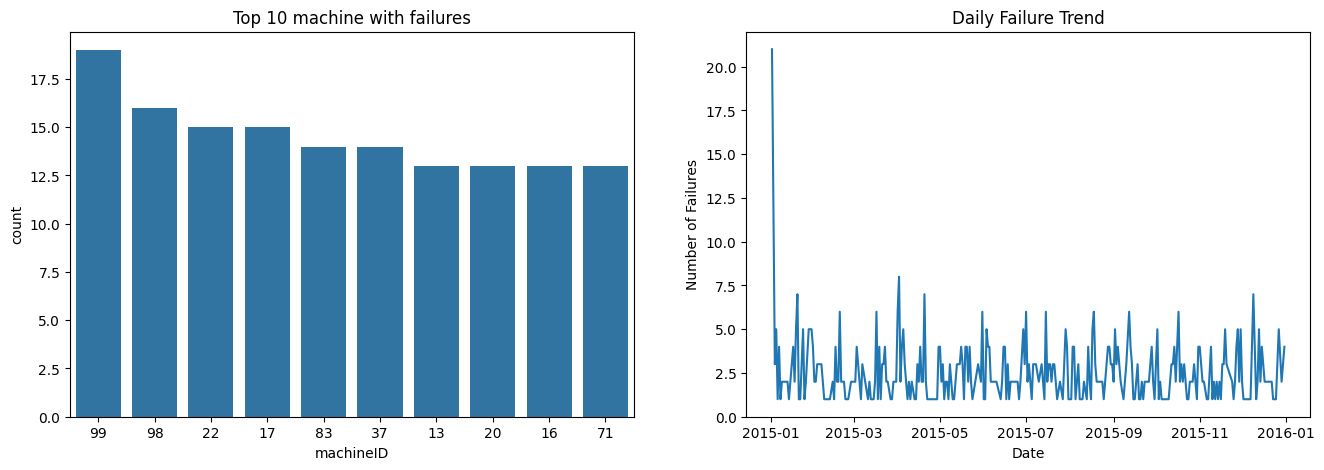

In [19]:
plt.figure(figsize=(16, 5))

# Top 10 machine with failures
plt.subplot(1, 2, 1)
sns.countplot(data=failures, x='machineID', order=failures['machineID'].value_counts().head(10).index)
plt.title("Top 10 machine with failures")

# Daily failures
plt.subplot(1, 2, 2)
failures['date'] = failures['datetime'].dt.date
daily_failures = failures.groupby('date').size()
daily_failures.plot()
plt.title('Daily Failure Trend')
plt.xlabel('Date')
plt.ylabel('Number of Failures')
plt.show()

### Telemetry

In this section, we will answer the following questions:
* **How does the telemetry metrics correlates?**
* **What are the distributions of my telemetry metrics (volt, rotate, pressure and vibration)?**
* **What do the telemetry metrics look like for a specific machine (Machine 1)?**
----

The telemetry dataset includes four sensor-based metrics (voltage, rotation, pressure, and vibration) recorded hourly during the year 2015 for all machines.

A correlation matrix shows no strong linear relationships between these metrics (values of zeros for all metrics), indicating that they operate independently in this dataset.

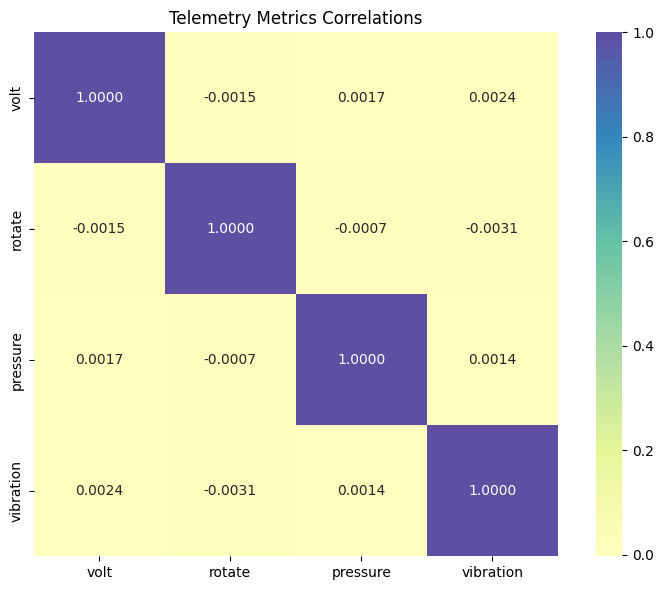

In [26]:
correlation_matrix = telemetry[['volt', 'rotate', 'pressure', 'vibration']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0,
            square=True, fmt='.4f')
plt.title('Telemetry Metrics Correlations')
plt.tight_layout()
plt.show()

To visualize their distributions, we used a pairplot grouped by machine ID. From the plot, all metrics appear to follow a **normal distribution**, with no particular relation between them (validated above with the correlation matrix). This type of distrubtion may suggest that the dataset is synthetic, and may not reflect the complexity of real-world sensor data.

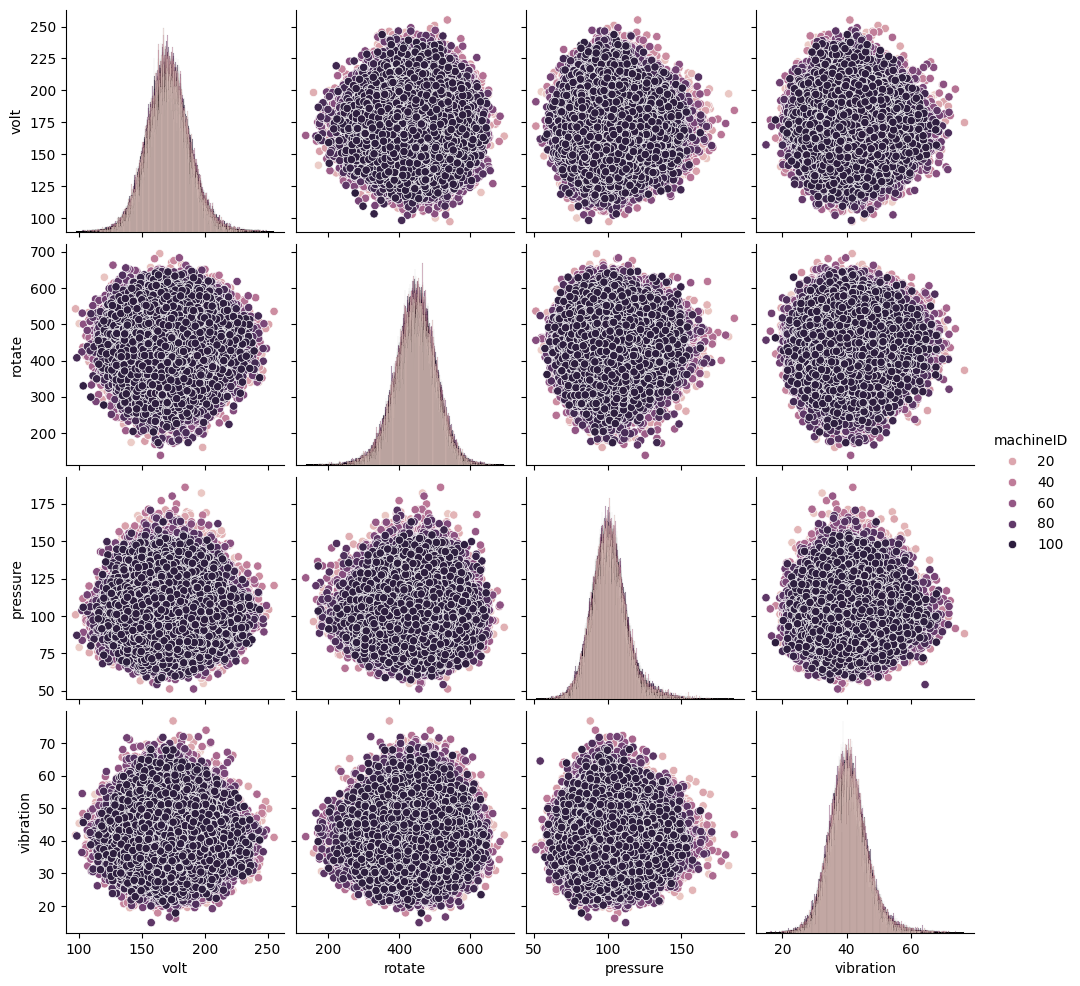

In [17]:
sns.pairplot(telemetry, hue="machineID", diag_kind="hist")

Finally, we examined the telemetry signals for Machine 1. The plot reveals the complex temporal behavior of the 4 individual metrics, which may be helpful for understanding anomaly patterns

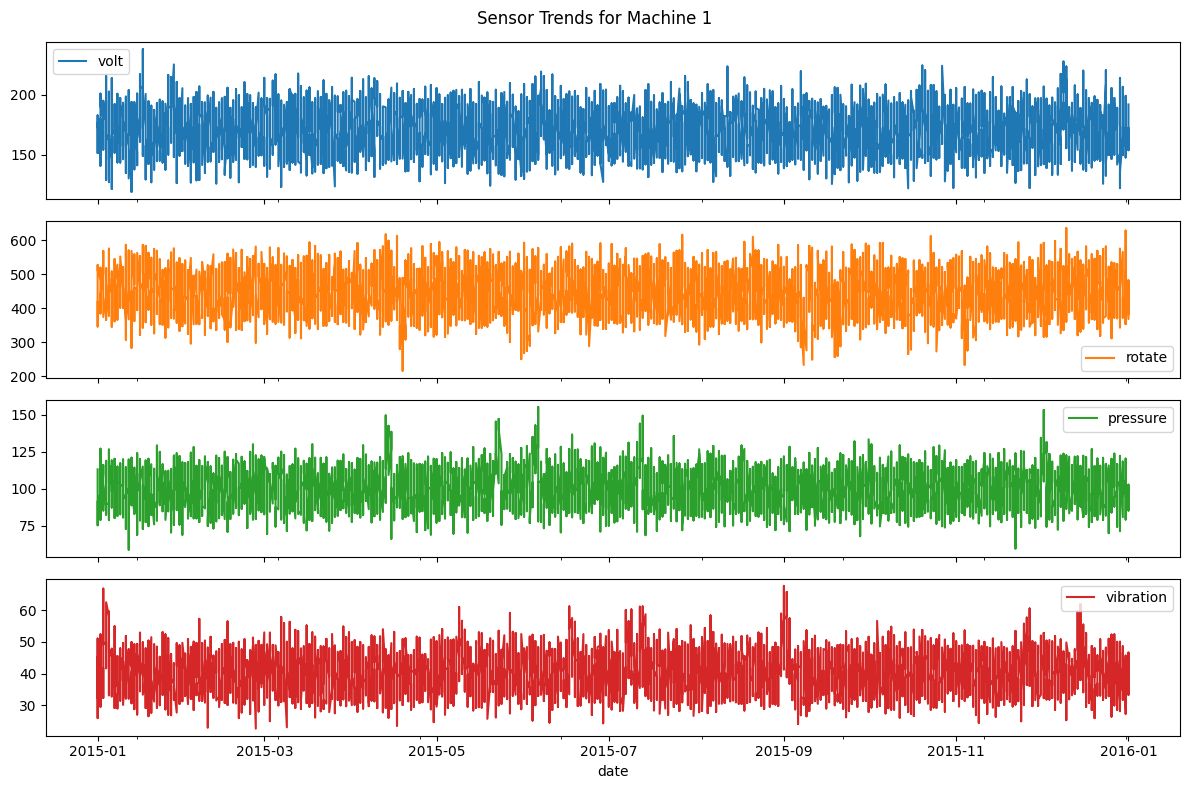

In [18]:
telemetry['date'] = telemetry['datetime'].dt.date
sample_machine = telemetry['machineID'].unique()[0]
df_machine = telemetry[telemetry['machineID'] == sample_machine]

df_machine.set_index('date')[['volt', 'rotate', 'pressure', 'vibration']].plot(
    subplots=True, figsize=(12, 8), title=f"Sensor Trends for Machine {sample_machine}")
plt.tight_layout()
plt.show()

In [29]:
df_machine.describe()

,datetime,machineID,volt,rotate,pressure,vibration
count,8761,8761.0,8761.000000,8761.000000,8761.000000,8761.000000
mean,2015-07-02 18:00:00,1.0,170.833898,446.336502,100.668306,40.586309
min,2015-01-01 06:00:00,1.0,119.059047,215.619476,58.733724,22.666865
25%,2015-04-02 12:00:00,1.0,160.382124,412.348209,93.320867,36.847203
50%,2015-07-02 18:00:00,1.0,170.618459,447.704679,100.319242,40.417442
75%,2015-10-02 00:00:00,1.0,180.929341,481.358342,107.377475,44.004311
max,2016-01-01 06:00:00,1.0,237.938518,636.364569,155.257527,67.633435
std,NaN,0.0,15.314388,52.224261,10.860264,5.542143


## Next steps

* Preprocessing of the data: Feature engineering, normalization and feature selection to develop a model.
* Model development: select and train a predictive model to estimate the likelihood of machine failure in the near future.